In [12]:
from hdimvis.algorithms.spring_force_algos.hybrid_algo.Hybrid import Hybrid
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from experiments.cube.Cube import Cube
from pathlib import Path
from definitions import PROJECT_ROOT
import pickle
from hdimvis.visualise_layouts_and_metrics.plot import show_layout,show_generation_metrics


In [13]:
cube = Cube(num_points=100, side=30, angle=0.4)
dataset_cube= cube.get_sample_dataset(3000)

In [14]:
rna = DataFetcher.fetch_data('rna N3k')
# coli20 =  DataFetcher.fetch_data('coil20')
# globe = DataFetcher.fetch_data('globe', size=3000)
# fmnist = DataFetcher.fetch_data('fashion mnist', size=3000)
# mnist = DataFetcher.fetch_data('mnist', size=3000)

# datasets = [rna, coli20,globe,fmnist, mnist]
# dataset_names = ['rna N3k', 'coli20', 'globe', 'fashion mnist', 'mnist']

####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################


In [15]:
dataset = rna

In [ ]:
num_repeats = 20
layouts = [[],[]]


for i in range(num_repeats):
    hybrid_correct = Hybrid(dataset=dataset, alpha=0.6,
                        use_knnd=False, sample_set_size=10, neighbour_set_size=5, use_correct_interpolation_error=True)
    hybrid_layout_correct = LayoutCreation().create_layout(hybrid_correct, optional_metric_collection=None)
    layouts[0].append(hybrid_layout_correct)


    hybrid = Hybrid(dataset=dataset, alpha=0.6,
                        use_knnd=False, sample_set_size=10, neighbour_set_size=5, use_correct_interpolation_error=False)
    hybrid_layout = LayoutCreation().create_layout(hybrid, optional_metric_collection=None)
    layouts[1].append(hybrid_layout)

output_dir= (Path(PROJECT_ROOT).joinpath(Path(f"experiments/hybrid/out/"))).resolve().absolute()

path_to_pickle_arr = (Path(output_dir).joinpath(Path(f"layouts.pickle"))).resolve()
with open(path_to_pickle_arr, 'wb') as pickle_out:
    pickle.dump(layouts, pickle_out)


####################
The algorithm will use a random initialization for the low D embedding/layout
[110, 53, 119, 98, 125, 127, 90, 53, 84, 115, 15, 4, 5, 29, 78, 64, 261, 280, 230, 239, 201, 299, 195, 151, 188, 185, 176, 227, 169, 185, 250, 279, 185, 389, 389, 445, 390, 414, 444, 336, 311, 308, 431, 436, 375, 355, 326, 408, 411, 402, 462, 594, 530, 556, 539, 490, 518, 579, 467, 580, 459, 500, 583, 472, 553, 545, 540, 728, 613, 624, 613, 643, 604, 647, 737, 667, 723, 740, 710, 615, 724, 687, 724, 623, 815, 771, 878, 784, 804, 897, 774, 788, 751, 858, 779, 841, 879, 862, 813, 771, 897, 846, 1040, 1030, 1008, 918, 957, 904, 956, 952, 1012, 997, 993, 976, 1037, 1038, 1019, 976, 1146, 1158, 1191, 1057, 1097, 1138, 1174, 1193, 1095, 1147, 1192, 1071, 1116, 1083, 1173, 1159, 1068, 1185, 1097, 1277, 1224, 1349, 1239, 1302, 1257, 1275, 1264, 1218, 1297, 1222, 1216, 1303, 1315, 1283, 1274, 1427, 1482, 1446, 1389, 1385, 1414, 1355, 1442, 1397, 1456, 1403, 1490, 1402, 1423, 1438, 1426, 1393, 1633

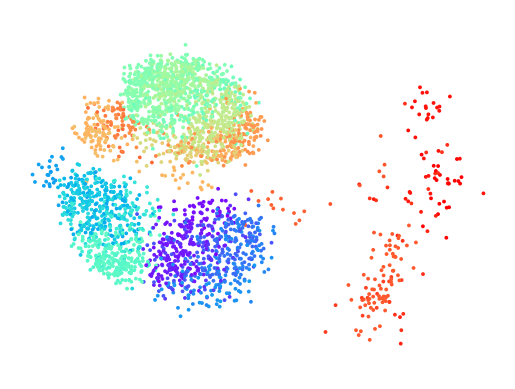

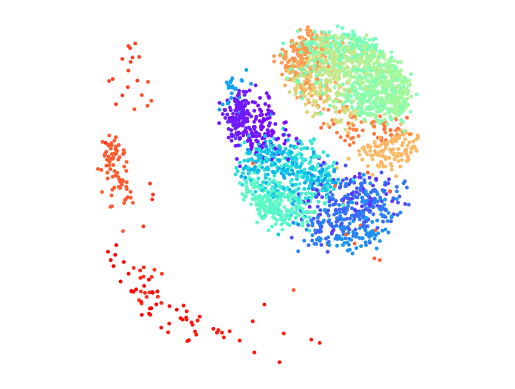

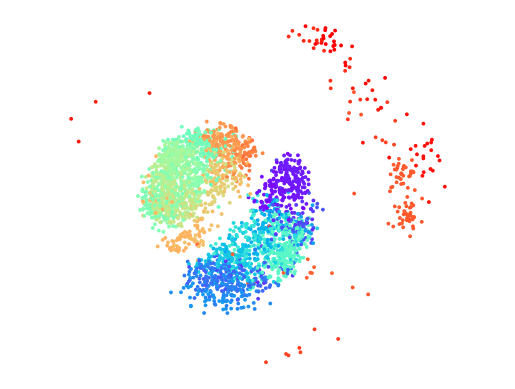

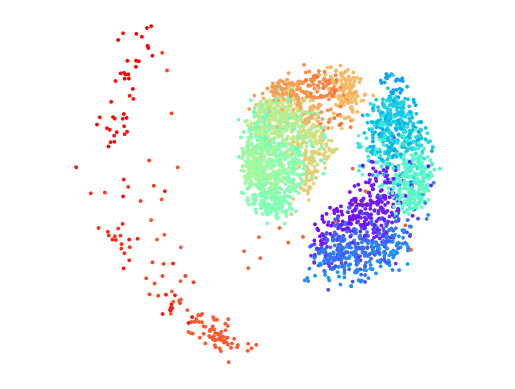

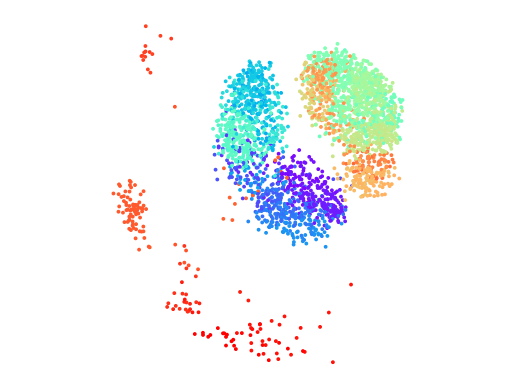

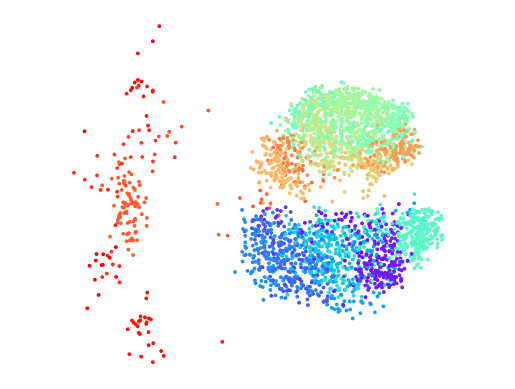

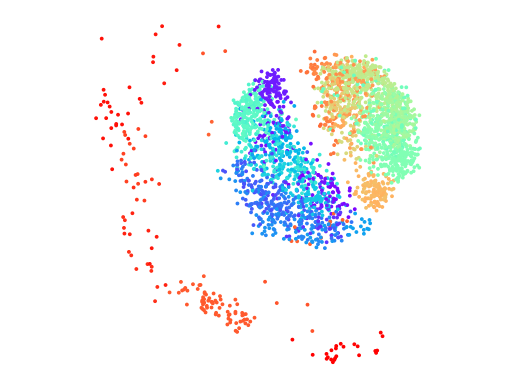

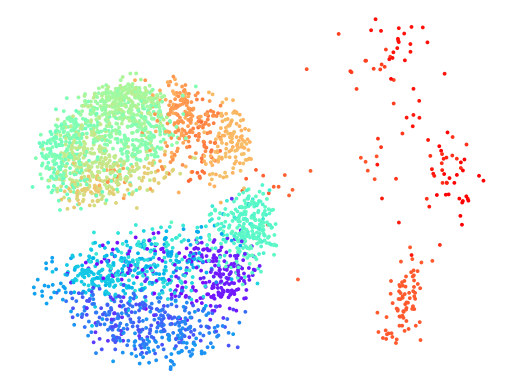

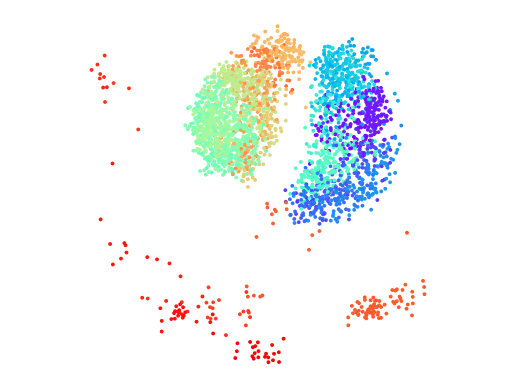

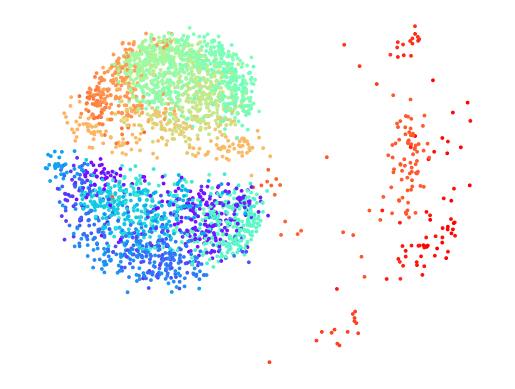

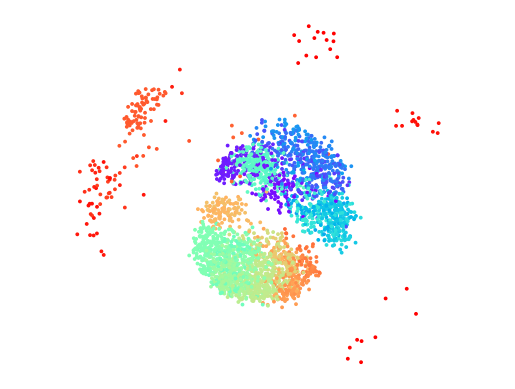

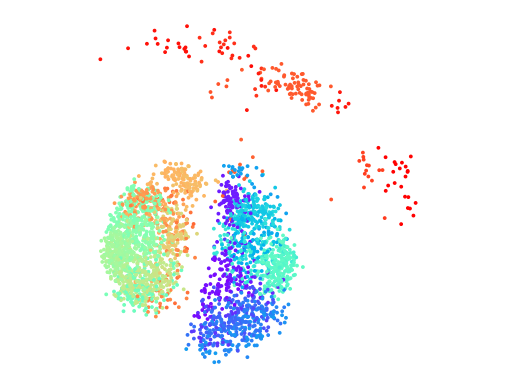

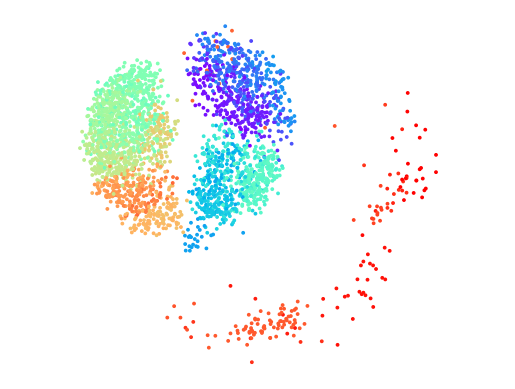

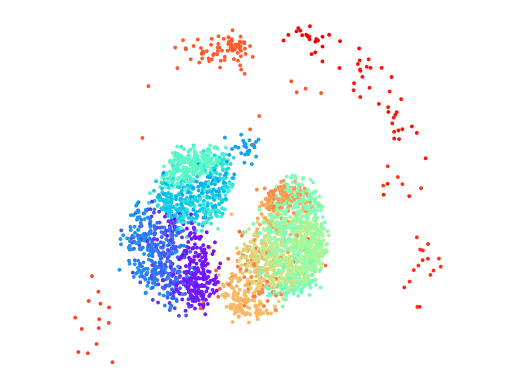

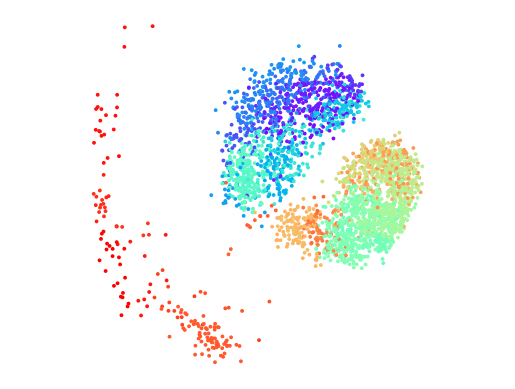

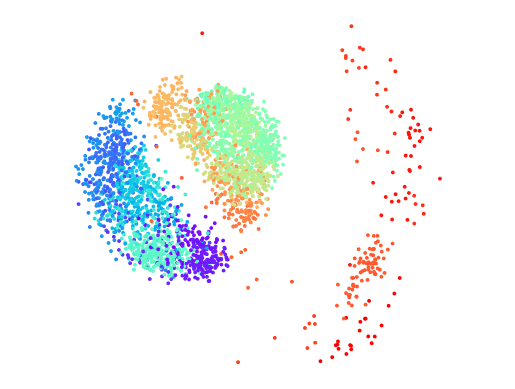

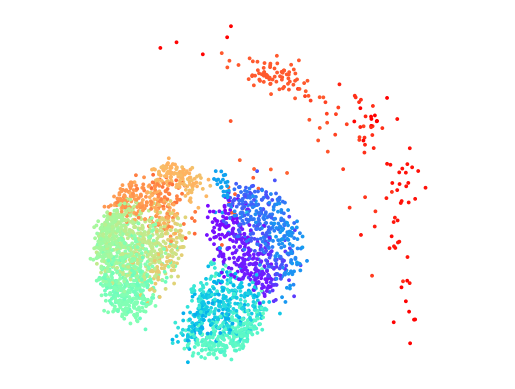

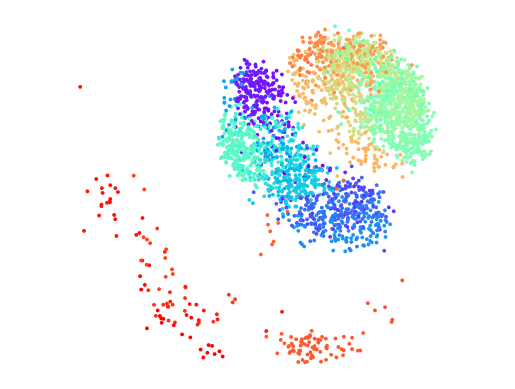

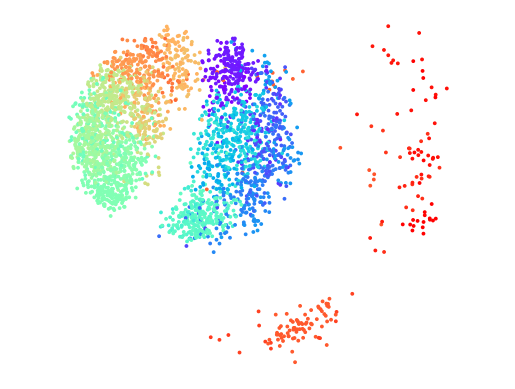

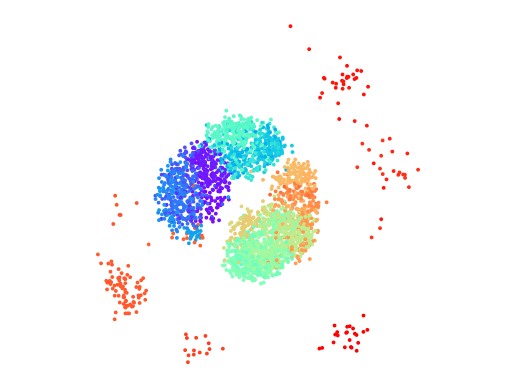

In [7]:
path_to_pickle = (Path(output_dir).joinpath(Path("layouts.pickle"))).resolve()
with open(path_to_pickle, 'rb') as file:
    layouts_s = pickle.load(file)

for layout in layouts_s[0]:
    show_layout(layout, use_labels=True)
    # show_generation_metrics(layout, average_speed=True)




In [8]:

import numpy as np
from experiments.utils.get_f1_for_best_k_with_knn import get_f1_for_best_k_with_knn
from experiments.utils.get_kmeans_f1 import get_kmeans_f1



results_arr = np.zeros((2,20,4))
for j in range(2):
    for i,layout in enumerate(layouts_s[j]):
        print(f"Layout: {i}")
        stress = layout.get_final_stress()
        kmeans_f1 = get_kmeans_f1(layout.get_final_positions(), layout.labels)
        k, f1_for_best_k_with_knn =  get_f1_for_best_k_with_knn(lower_bound=1, upper_bound=30,
                                                            cross_validation_folds=10,
                                                             data=layout.data,
                                                             labels=layout.labels)

        results_arr[j,i,0] = stress
        results_arr[j,i,1] = kmeans_f1
        results_arr[j,i,2],results_arr[j,i,3] =k,  f1_for_best_k_with_knn

print(results_arr)
output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/hybrid/out/"))).resolve().absolute()

path_to_pickle_arr = (Path(output_dir).joinpath(Path(f"results_arr_placement.pickle"))).resolve()
with open(path_to_pickle_arr, 'wb') as pickle_out:
    pickle.dump(results_arr, pickle_out)

Layout: 0

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 1

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 2

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 3

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 4

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 5

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 6

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 7

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 8

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 9

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 10

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 11

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 12

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 13

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 14

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 15

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 16

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 17

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 18

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 19

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 0

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 1

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 2

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 3

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 4

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 5

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 6

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 7

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 8

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 9

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 10

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 11

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 12

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 13

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 14

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 15

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 16

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 17

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 18

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 19

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[[0.26795619 0.15550586 1.         0.79959343]
  [0.28093354 0.16426498 1.         0.79959343]
  [0.28886263 0.14832321 1.         0.79959343]
  [0.28106511 0.17388331 1.         0.79959343]
  [0.27533551 0.15541747 1.         0.79959343]
  [0.27687975 0.14508147 1.         0.79959343]
  [0.27999658 0.12941176 1.         0.79959343]
  [0.27421228 0.16130123 1.         0.79959343]
  [0.28467914 0.15241397 1.         0.79959343]
  [0.2778837  0.15339317 1.         0.79959343]
  [0.28318293 0.14918302 1.         0.79959343]
  [0.27440413 0.13887827 1.         0.79959343]
  [0.26826006 0.15070771 1.         0.79959343]
  [0.28809561 0.14914182 1.         0.79959343]
  [0.27663624 0.15181816 1.         0.79959343]
  [0.29431436 0.16155819 1.         0.79959343]
  [0.26814137 0.15047445 1.         0.79959343]
  [0.27494419 0.15707181 1.         0.79959343]
  [0.2769498  0.17033278 1.         0.79959343]
  [0.29094919 0.16335668 1.         0.79959343]]

 [[0.31078687 0.14045919 1.         0.

In [9]:
output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/hybrid/out/"))).resolve().absolute()

path_to_pickle_arr = (Path(output_dir).joinpath(Path(f"results_arr_placement.pickle"))).resolve()
with open(path_to_pickle_arr, 'wb') as pickle_out:
    pickle.dump(results_arr, pickle_out)

In [ ]:
with open(path_to_pickle_arr, 'rb') as file:
    results_arr = pickle.load(file)

In [11]:
from scipy import stats
for j,metric in enumerate(["stress", "kmeans", "k", "knn"]):

        if j != 2:
            mean_squad = np.mean(results_arr[0,:,j])
            sd_squad = np.std(results_arr[0,:,j])

            mean_96 = np.mean(results_arr[1,:,j])
            sd_96 = np.std(results_arr[1,:,j])

            if j ==1:
                tstat, pvalue = stats.ttest_ind(results_arr[0,:,j].round(decimals=4), results_arr[1,:,j].round(decimals=4), equal_var=False, alternative='smaller')
                result = np.format_float_scientific(pvalue, precision=2,min_digits=2)

            else:
                tstat, pvalue = stats.ttest_ind(results_arr[0,:,j].round(decimals=4), results_arr[1,:,j].round(decimals=4), equal_var=False, alternative='greater')
                result = np.format_float_scientific(pvalue, precision=2,min_digits=2)
            print(20*"#")
            print(f"Metric : {metric}")
            print(20*"#")


            print(f"Squad mean : {mean_squad.round(decimals=2)} (SD {sd_squad.round(decimals=2)})")
            print(f"96 mean : {mean_96.round(decimals=2)} (SD {sd_96.round(decimals=2)})")
            print(f"test: {result}")
        else:
            print(f"Squad mean k: {np.mean(results_arr[0,:,j])}")
            print(f"96 mean k: {np.mean(results_arr[1,:,j])}")


####################
Metric : stress
####################
Squad mean : 0.28 (SD 0.01)
96 mean : 0.3 (SD 0.02)
test: 1.00e+00
####################
Metric : kmeans
####################
Squad mean : 0.15 (SD 0.01)
96 mean : 0.15 (SD 0.01)
test: 4.47e-01
Squad mean k: 1.0
96 mean k: 1.0
####################
Metric : knn
####################
Squad mean : 0.8 (SD 0.0)
96 mean : 0.8 (SD 0.0)
test: nan


C:\Users\Owner\AppData\Local\Temp\ipykernel_3144\1976717739.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tstat, pvalue = stats.ttest_ind(results_arr[0,:,j].round(decimals=4), results_arr[1,:,j].round(decimals=4), equal_var=False, alternative='two-sided')
